<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import threading
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

IMPORTING THE DATASET

In [2]:
data = pd.read_csv("/content/Groceries_dataset.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
data['Quantity'] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


EXPLORATORY DATA ANALYSIS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


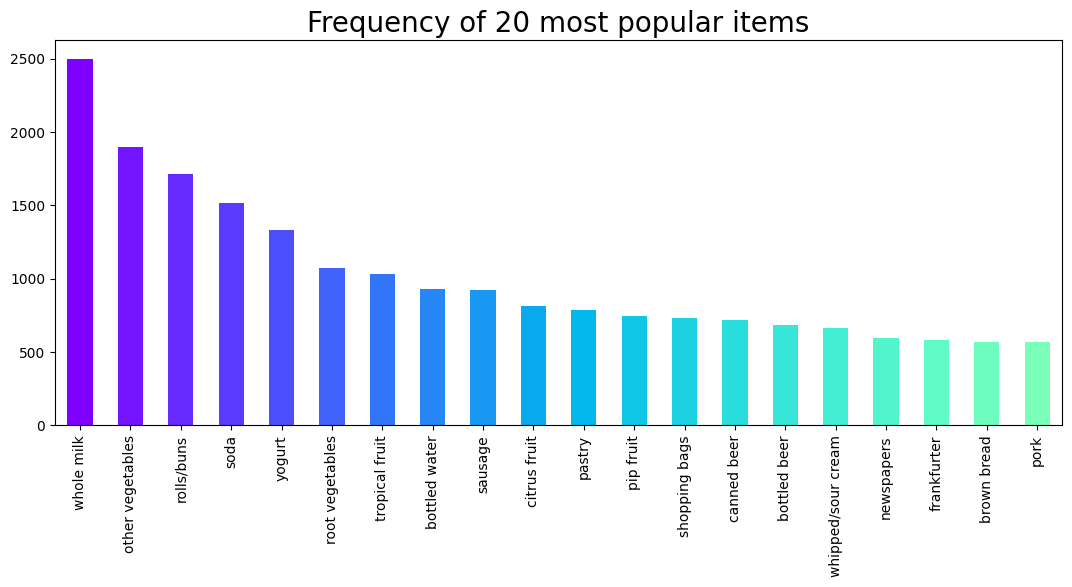

In [5]:
#Printing the top 20 items from the dataset using bar chart
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data["itemDescription"].value_counts().head(20).plot.bar(color = color, figsize=(13,5))
plt.title('Frequency of 20 most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.show()

In [6]:
#Converting the data into matrix format for easier analysis
transactions = data.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index('Member_number')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
#Printing the list of transactions
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3894,4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3895,4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3896,4999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [8]:
transactions = transactions.drop(columns = 'Member_number')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
transactions.fillna(0,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
transactions.astype("int")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,1,0


In [11]:
def encode(x):
  if x<=0:
    return 0
  elif x>=0:
    return 1
encoded = transactions.applymap(encode)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
apriori1 = threading.Event()
fpgrowth1 = threading.Event()

In [41]:
execution_time = [0,0]

In [42]:
minimum_support = float(input("Set the minimum support"))

Set the minimum support0.02


In [52]:
def apriorirun():
  stime = time.time()
  apresults = apriori(encoded,min_support = minimum_support, use_colnames=True)
  execution_time[0] = time.time() - stime
  apriori1.set()
  return apresults

In [53]:
rulesap = association_rules(apriorirun(), metric='lift',min_threshold=1)

In [54]:
rulesap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,0.004517,1.023477,0.269801
1,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,0.004517,1.078960,0.230217
2,(other vegetables),(UHT-milk),0.376603,0.078502,0.038994,0.103542,1.318979,0.009430,1.027933,0.387936
3,(UHT-milk),(other vegetables),0.078502,0.376603,0.038994,0.496732,1.318979,0.009430,1.238697,0.262440
4,(rolls/buns),(UHT-milk),0.349666,0.078502,0.031042,0.088775,1.130863,0.003592,1.011274,0.177939
...,...,...,...,...,...,...,...,...,...,...
2951,"(yogurt, rolls/buns)","(soda, whole milk)",0.111339,0.151103,0.024628,0.221198,1.463889,0.007804,1.090004,0.356590
2952,(soda),"(whole milk, yogurt, rolls/buns)",0.313494,0.065931,0.024628,0.078560,1.191540,0.003959,1.013705,0.234157
2953,(whole milk),"(soda, yogurt, rolls/buns)",0.458184,0.042329,0.024628,0.053751,1.269836,0.005233,1.012071,0.392193
2954,(yogurt),"(soda, whole milk, rolls/buns)",0.282966,0.065162,0.024628,0.087035,1.335684,0.006190,1.023959,0.350499


In [64]:
rulesap['antecedents'] = rulesap['antecedents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
rulesap['consequents'] = rulesap['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [65]:
#Computing the best choices
best_choice = rulesap.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
                                  antecedents                    consequents  \
2734  yogurt, bottled water, other vegetables                     whole milk   
1086              bottled beer, shopping bags                     whole milk   
2847     yogurt, other vegetables, rolls/buns                     whole milk   
1484               shopping bags, canned beer                     whole milk   
2888           soda, yogurt, other vegetables                     whole milk   
...                                       ...                            ...   
1757                               whole milk  tropical fruit, domestic eggs   
1720                               whole milk           tropical fruit, curd   
1444                               whole milk            pastry, canned beer   
1511                               whole milk      chicken, other vegetables   
1600                               whole milk          sausage, citrus fruit   

     

In [66]:
itemsetap = []
a = best_choice['antecedents'].astype('string')
b = best_choice['consequents'].astype('string')
itemsetap = a + "," + b

In [68]:
best_choice['itemsets'] = itemsetap

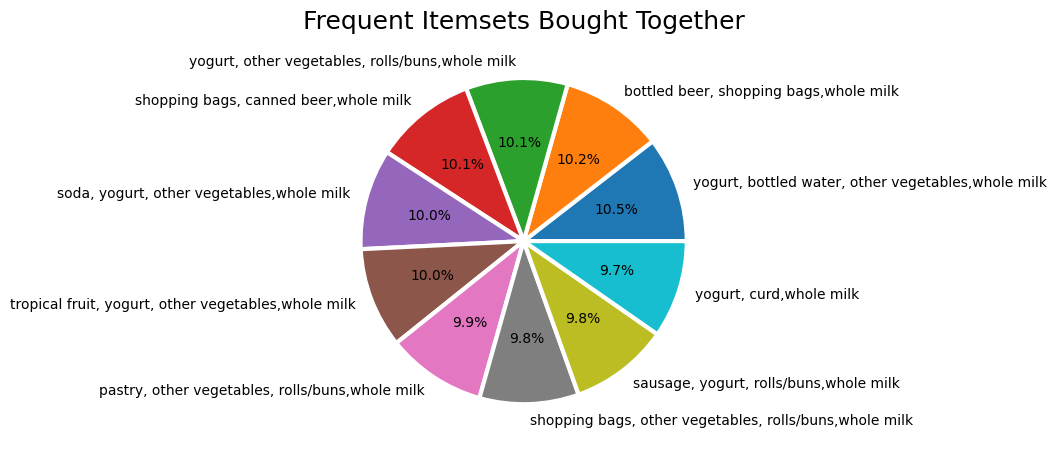

In [79]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(best_choice['confidence'].head(10),labels=best_choice['itemsets'].head(10), autopct= '%.1f%%',wedgeprops = {'linewidth':3.0,'edgecolor':'white'})
ax.set_title("Frequent Itemsets Bought Together",fontsize = 18)
plt.tight_layout()
plt.show()

In [56]:
def fpgrowthrun():
  stime = time.time()
  fpresults = fpgrowth(encoded,min_support=minimum_support,use_colnames=True)
  execution_time[1] = time.time() - stime
  fpgrowth1.set()
  return fpresults

In [57]:
rulesfp = association_rules(fpgrowthrun(),metric="lift",min_threshold=1)

In [58]:
rulesfp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971,0.071966
1,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184
2,(soda),(rolls/buns),0.313494,0.349666,0.119805,0.382160,1.092928,0.010187,1.052593,0.123855
3,(rolls/buns),(soda),0.349666,0.313494,0.119805,0.342627,1.092928,0.010187,1.044316,0.130743
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,0.006103,1.032237,0.071601
...,...,...,...,...,...,...,...,...,...,...
2951,(cat food),(other vegetables),0.043869,0.376603,0.024115,0.549708,1.459646,0.007594,1.384426,0.329351
2952,(whole milk),(chewing gum),0.458184,0.044638,0.025654,0.055991,1.254328,0.005202,1.012026,0.374223
2953,(chewing gum),(whole milk),0.044638,0.458184,0.025654,0.574713,1.254328,0.005202,1.274001,0.212234
2954,(other vegetables),(chewing gum),0.376603,0.044638,0.020523,0.054496,1.220834,0.003712,1.010426,0.290165


In [70]:
rulesfp['antecedents'] = rulesfp['antecedents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
rulesfp['consequents'] = rulesfp['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [71]:
#Computing the best choices
bestchoice = rulesap.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
                                  antecedents                    consequents  \
2734  yogurt, bottled water, other vegetables                     whole milk   
1086              bottled beer, shopping bags                     whole milk   
2847     yogurt, other vegetables, rolls/buns                     whole milk   
1484               shopping bags, canned beer                     whole milk   
2888           soda, yogurt, other vegetables                     whole milk   
...                                       ...                            ...   
1757                               whole milk  tropical fruit, domestic eggs   
1720                               whole milk           tropical fruit, curd   
1444                               whole milk            pastry, canned beer   
1511                               whole milk      chicken, other vegetables   
1600                               whole milk          sausage, citrus fruit   

     

In [72]:
itemsetfp = []
a = bestchoice['antecedents'].astype('string')
b = bestchoice['consequents'].astype('string')
itemsetfp = a + "," + b

In [73]:
bestchoice['itemsets'] = itemsetfp

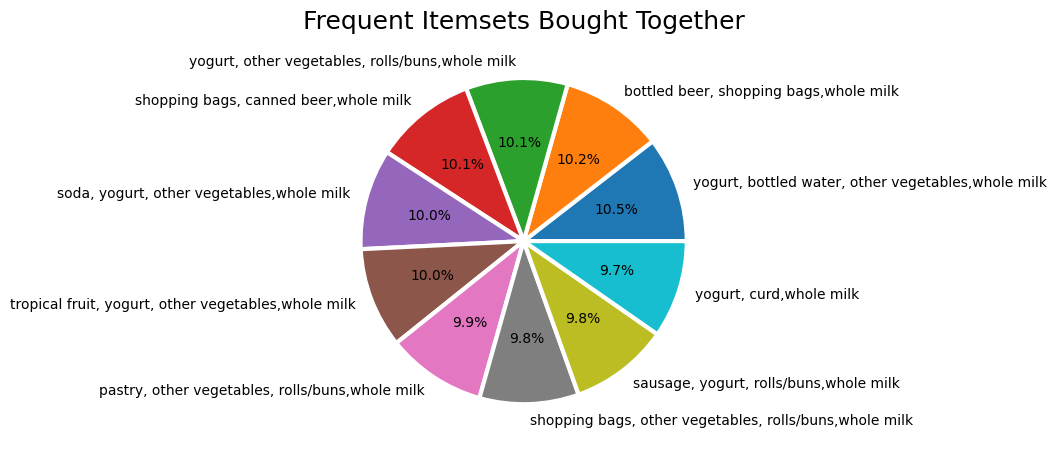

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(bestchoice['confidence'].head(10),labels=bestchoice['itemsets'].head(10), autopct= '%.1f%%',wedgeprops = {'linewidth':3.0,'edgecolor':'white'})
ax.set_title("Frequent Itemsets Bought Together",fontsize = 18)
plt.tight_layout()
plt.show()

In [45]:
apithread=threading.Thread(target=apriorirun)
fpthread=threading.Thread(target=fpgrowthrun)

In [46]:
apithread.start()
fpthread.start()
apriori1.wait()
fpgrowth1.wait()
apithread.join()
fpthread.join()

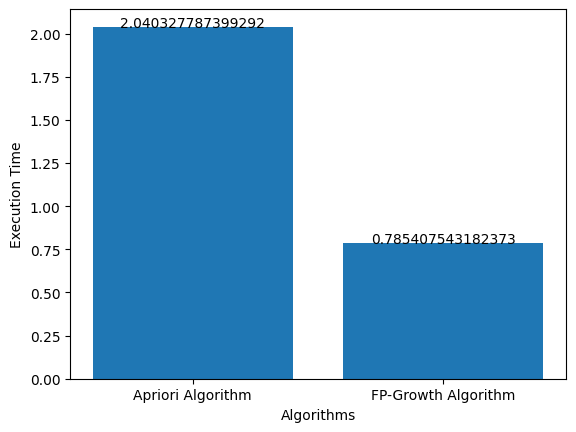

In [84]:
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = "center")
Algorithms = ['Apriori Algorithm','FP-Growth Algorithm']
plt.bar(algorithms,execution_time,label = execution_time)
plt.xlabel("Algorithms")
plt.ylabel("Execution Time")
addlabels(algorithms,execution_time)
plt.show()


In [81]:
if execution_time[0] > execution_time[1]:
  print("I recomment FP Growth Algorithm")
else:
  print("I recommend Apriori Algorithm")

I recomment FP Growth Algorithm


In [35]:
df = pd.DataFrame(data = encoded.values.T@encoded.values, columns = encoded.columns, index = encoded.columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
df_top = df_top.groupby(level=0).first()
df_top.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,UHT-milk,beef,berries,bottled beer,bottled beer,whole milk,whole milk,whole milk,whole milk,whole milk,...,pastry,pastry,pip fruit,pip fruit,pork,shopping bags,shopping bags,whipped/sour cream,whipped/sour cream,white bread
itemDescription,,,,,,,,,,,,,,,,,,,,,
UHT-milk,306,41,29,58,58,158,158,158,158,158,...,56,56,67,67,42,65,65,54,54,25
beef,41,466,44,81,81,250,250,250,250,250,...,96,96,98,98,71,76,76,88,88,49
berries,29,44,311,65,65,153,153,153,153,153,...,71,71,71,71,50,68,68,63,63,36
bottled beer,58,81,65,619,619,333,333,333,333,333,...,131,131,130,130,93,118,118,114,114,65
bottled water,83,101,76,157,157,438,438,438,438,438,...,170,170,158,158,110,164,164,138,138,83
